# Population, Agricultural Production, and the Green Revolution

In [20]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Set World Bank Data Sources/Indicators for Population
 
SOURCE = 40 # "Population estimates and projections
pop_indicators = wbdata.get_indicators(source=SOURCE)

pop_indicators

Key '-6930157404219747317' not in persistent cache.


id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

## Population Analysis

### Mainland Southeast Asia (Cambodia, Lao People’s Democratic Republic, Myanmar, Thailand, Viet Nam)

In [13]:
# Load in population data and specify SA data set
variable_labels = {"SP.POP.TOTL":"Total Population", 
                   "SP.POP.TOTL.FE.IN":"Total Female",
                  "SP.POP.TOTL.MA.IN":"Total Male",
                  "SP.RUR.TOTL":"Total Rural",
                  "SP.URB.TOTL":"Total Urban"}
countries = {"KHM": "Cambodia",
             "LAO": "Lao PDR",
             "MMR": "Myanmar",
             "THA": "Thailand",
             "VNM": "Viet Nam"
            }

SEA_pop = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()

SEA_pop = SEA_pop.unstack('country')
SEA_pop = SEA_pop.reset_index()
SEA_pop = SEA_pop.rename(columns={'date': 'Year'})
SEA_pop = SEA_pop.set_index(['Year']).sort_index()
SEA_pop
# Attributes of interest: Total Population, Total Female Population, Total Male Population, Total Rural Population
# and Total Urban Population

Total Population                                                  \
country            Cambodia    Lao PDR     Myanmar    Thailand     Viet Nam   
Year                                                                          
1960-01-01        5449966.0  2121514.0  21730250.0  26851747.0   32531933.0   
1961-01-01        5571168.0  2169796.0  22210581.0  27650334.0   33409059.0   
1962-01-01        5697558.0  2219910.0  22704719.0  28481040.0   34288560.0   
1963-01-01        5823010.0  2271061.0  23213408.0  29342322.0   35249101.0   
1964-01-01        5946178.0  2322826.0  23737315.0  30232141.0   36201563.0   
...                     ...        ...         ...         ...          ...   
2019-01-01       16481304.0  7237636.0  52640713.0  71522271.0   97173776.0   
2020-01-01       16725474.0  7346533.0  53016522.0  71641484.0   98079191.0   
2021-01-01       16974305.0  7453194.0  53387102.0  71727332.0   98935098.0   
2022-01-01       17201724.0  7559007.0  53756787.0  71735329.0   99680655.0   
2023-01-01       17423880.0  7664993.0  54133798.0  71702435.0  100352192.0   

           Total Female                                                 ...  \
country        Cambodia    Lao PDR     Myanmar    Thailand    Viet Nam  ...   
Year                                                                    ...   
1960-01-01    2714524.0  1072624.0  10857869.0  13309539.0  16475729.0  ...   
1961-01-01    2774561.0  1096926.0  11096837.0  13703413.0  16915720.0  ...   
1962-01-01    2837311.0  1121860.0  11342642.0  14114001.0  17358348.0  ...   
1963-01-01    2899636.0  1147443.0  11595512.0  14539996.0  17844183.0  ...   
1964-01-01    2960870.0  1173645.0  11855734.0  14980301.0  18327884.0  ...   
...                 ...        ...         ...         ...         ...  ...   
2019-01-01    8423919.0  3597824.0  26389410.0  36498738.0  49610246.0  ...   
2020-01-01    8544837.0  3652811.0  26585323.0  36601089.0  50061601.0  ...   
2021-01-01    8667395.0  3706725.0  26780850.0  36686198.0  50486603.0  ...   
2022-01-01    8779871.0  3759858.0  26977460.0  36730034.0  50859448.0  ...   
2023-01-01    8889929.0  3813122.0  27177563.0  36752428.0  51201223.0  ...   

           Total Rural                                                 \
country       Cambodia    Lao PDR     Myanmar    Thailand    Viet Nam   
Year                                                                    
1960-01-01   4889437.0  1952938.0  17552392.0  21569471.0  27749739.0   
1961-01-01   4997728.0  1995778.0  17864859.0  22180821.0  28387343.0   
1962-01-01   5108829.0  2040208.0  18184209.0  22816161.0  29018751.0   
1963-01-01   5211769.0  2085515.0  18510604.0  23473858.0  29710057.0   
1964-01-01   5312197.0  2131286.0  18844342.0  24152457.0  30386144.0   
...                ...        ...         ...         ...         ...   
2019-01-01  12557930.0  4657781.0  36400000.0  35266201.0  61580965.0   
2020-01-01  12672557.0  4680476.0  36506647.0  34796269.0  61456421.0   
2021-01-01  12787083.0  4700059.0  36597926.0  34312204.0  61288315.0   
2022-01-01  12881683.0  4717425.0  36677718.0  33795231.0  61038452.0   
2023-01-01  12968594.0  4733363.0  36750353.0  33264194.0  60733147.0   

           Total Urban                                                 
country       Cambodia    Lao PDR     Myanmar    Thailand    Viet Nam  
Year                                                                   
1960-01-01    560529.0   168576.0   4177858.0   5282276.0   4782194.0  
1961-01-01    573440.0   174018.0   4345722.0   5469513.0   5021716.0  
1962-01-01    588729.0   179702.0   4520510.0   5664879.0   5269809.0  
1963-01-01    611241.0   185546.0   4702804.0   5868464.0   5539044.0  
1964-01-01    633981.0   191540.0   4892973.0   6079684.0   5815419.0  
...                ...        ...         ...         ...         ...  
2019-01-01   3923374.0  2579855.0  16240713.0  36256070.0  35592811.0  
2020-01-01   4052917.0  2666057.0  16509875.0  3684521

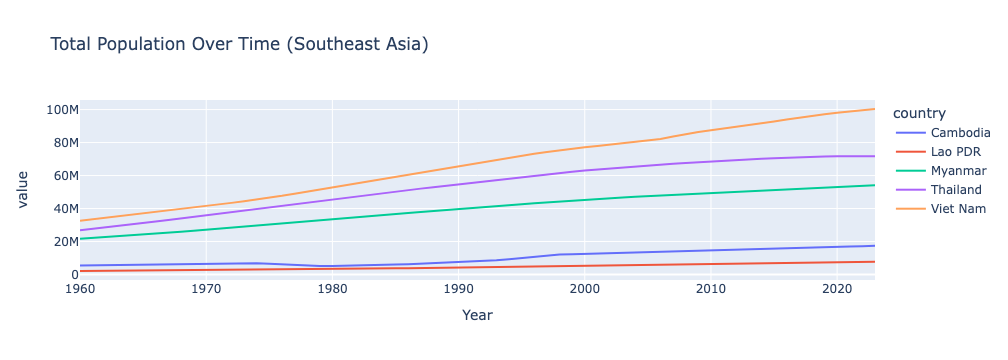

In [14]:
# Produce total population over time plot (include each country and the region)
SEA_total = SEA_pop["Total Population"]

SEA_total.plot(title="Total Population Over Time (Southeast Asia)")

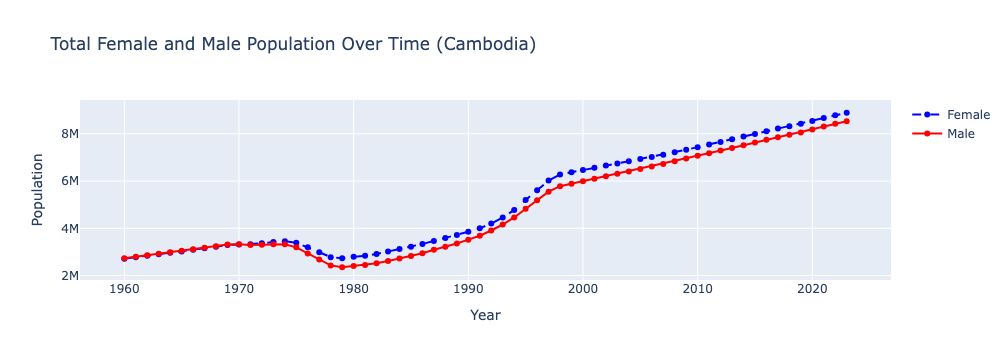

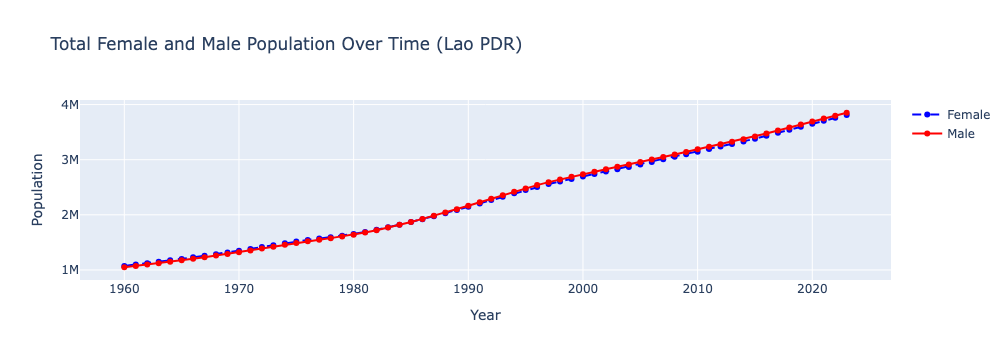

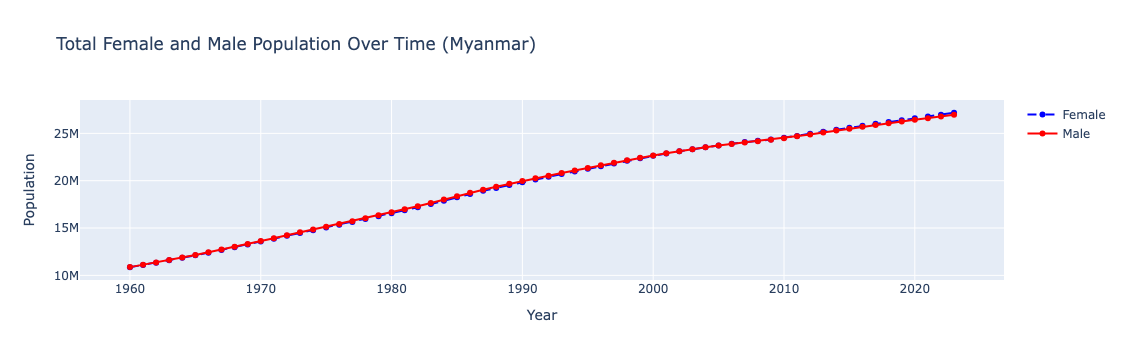

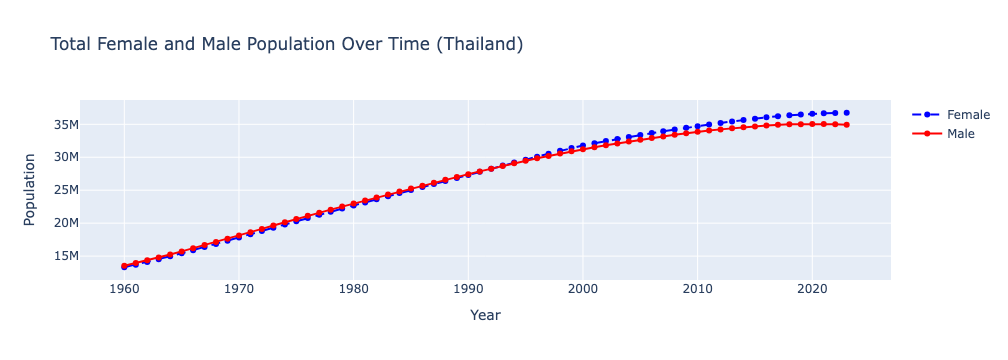

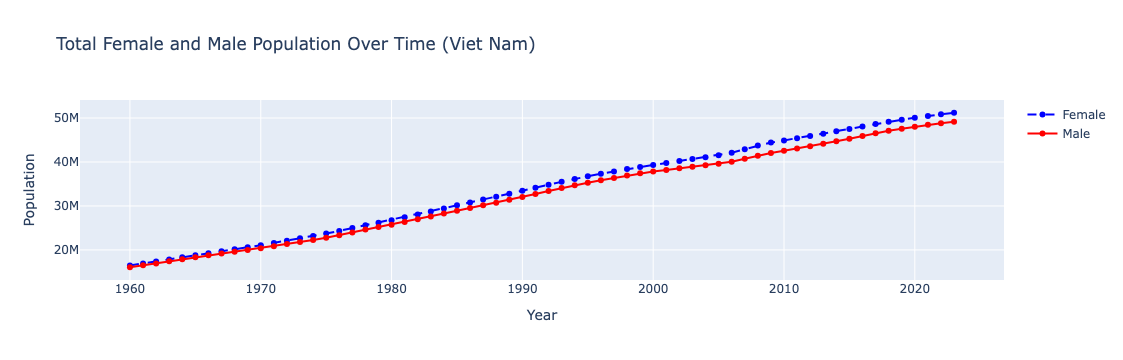

In [16]:
# Produce total female versus male populations over time for each country 

import plotly.graph_objects as go

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    female = df[('Total Female', country_name)]
    male = df[('Total Male', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Female and Male Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()


overlay_population("Cambodia", SEA_pop)
overlay_population("Lao PDR", SEA_pop)
overlay_population("Myanmar", SEA_pop)
overlay_population("Thailand", SEA_pop)
overlay_population("Viet Nam", SEA_pop)

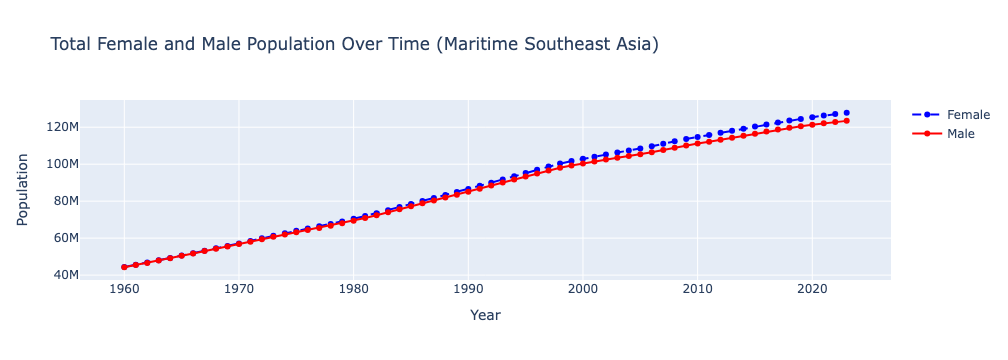

In [18]:
# Produce total female versus male populations over time for region as a whole
import plotly.graph_objects as go

def overlay_region_population(df, countries):
    """
    Function to overlay the total female and male population for the region (Maritime Southeast Asia).
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the population data.
    - countries (list): List of country names in the region to aggregate the data.
    
    Returns:
    - A Plotly figure with the overlayed female and male population data for the region.
    """
    
    # Aggregate the female and male population across the specified countries
    female_pop_region = df["Total Female"][countries].sum(axis=1)
    male_pop_region = df["Total Male"][countries].sum(axis=1)
    
    # Create a figure
    fig = go.Figure()
    
    # Add the total female population plot
    fig.add_trace(go.Scatter(x=female_pop_region.index, y=female_pop_region, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the total male population plot
    fig.add_trace(go.Scatter(x=male_pop_region.index, y=male_pop_region, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Female and Male Population Over Time (Maritime Southeast Asia)",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

# List of countries in Southeast Asia
SEA_countries = ["Cambodia", "Lao PDR", "Myanmar", "Thailand", "Viet Nam"]

# Call the function to plot total female and male population for the region
overlay_region_population(SEA_pop, SEA_countries)

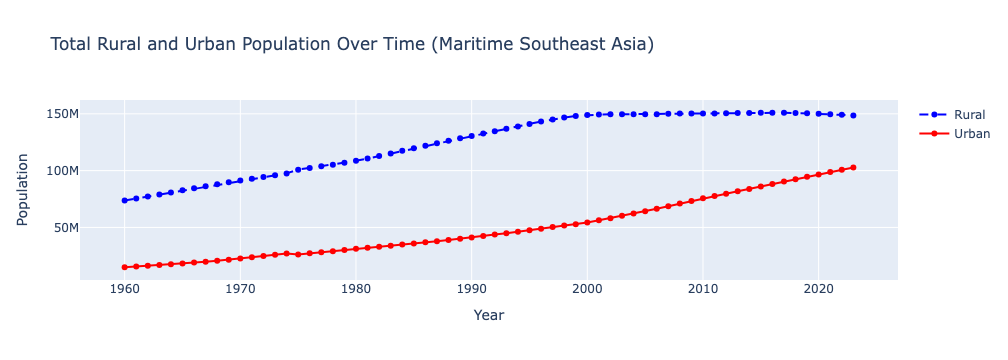

In [19]:
# Produce total rural versus urban populations over time for region as a whole
import plotly.graph_objects as go

def overlay_rural_urban_region(df):
    """
    Function to overlay total rural and urban populations for the region (Maritime Southeast Asia) as a whole.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the population data for the region.

    Returns:
    - A Plotly figure with the overlayed total rural and urban population data for the region.
    """
    # Aggregate total rural and urban populations across all countries
    rural = df['Total Rural'].sum(axis=1)
    urban = df['Total Urban'].sum(axis=1)
    
    # Create a figure
    fig = go.Figure()
    
    # Add the rural population plot
    fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', name='Rural', line=dict(dash='dash', color='blue')))
    
    # Add the urban population plot
    fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', name='Urban', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Rural and Urban Population Over Time (Maritime Southeast Asia)",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

# Call the function to overlay total rural and urban populations for the region
overlay_rural_urban_region(SEA_pop)